# Angle Analysis

The goal of this notebook is to investigate the true and predicted distributions of various
angles predicted by OpenFold. In particular, we'll focus on the sidechain Chi angles and
compare their ground truth distributions to the predicted distributions from the ResNet
and Angle Transformer models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import prody as pr

from tqdm import tqdm
tqdm.pandas()

import sidechainnet as scn

# Disable scientific notation
np.set_printoptions(suppress=True)

# Make plots look nice
sns.set_theme(style="whitegrid")

## Using prody to identify coordinates whos values are all zero

In [3]:

example_file = "/net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-01-eval/pdbs/val/true/true_0000_7au7_A.pdb"

def get_coords(pdb_file):
    """Returns a numpy array of coordinates from a pdb file"""
    coords = pr.parsePDB(pdb_file).getCoords()
    return coords

def get_zero_coords(coords):
    """Returns a list of coordinates whos values are all zero"""
    # zero_coords = []
    # for i in range(len(coords)):
    #     if np.all(coords[i] == 0):
    #         zero_coords.append(i)
    # return zero_coords
    return np.equal(coords, 0).all(axis=1)

def get_zero_coords_list(pdb_file):
    """Returns a list of coordinates whos values are all zero"""
    coords = get_coords(pdb_file)
    zero_coords = get_zero_coords(coords)
    return zero_coords

np.where(get_zero_coords_list(example_file))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

## Angle Analysis

In [4]:
VAL_PRED_PDB_PATH_BL = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    "angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/pred"
VAL_TRUE_PDB_PATH_BL = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    "angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/true"

at_model = "angletransformer-unmin-noomm-09-eval"
# at_model = "angletransformer-unmin-noomm-01-eval"

VAL_PRED_PDB_PATH_AT = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    f"{at_model}/pdbs/val/pred"
VAL_TRUE_PDB_PATH_AT = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    f"{at_model}/pdbs/val/true"

In [5]:
# SidechainNet, when loading a PDB file, will compute angles for us

# Let's make a dataframe that contains pdb_ids, and the path to the pdb file.

def get_relevant_pdb_paths(pdb_path, step_restriction=None, latest_step_only=True):
    # Format step_restriction, an int, to a string left padded with zeros to 4 digits
    if step_restriction is not None:
        step_restriction = str(step_restriction).zfill(4)
    pdb_paths = []
    for single_pdb_path in os.listdir(pdb_path):
        if step_restriction is not None and step_restriction not in single_pdb_path:
            continue 
        pdb_paths.append(os.path.join(pdb_path, single_pdb_path))
    return pdb_paths

def get_pdbid_from_path(path):
    return "_".join(os.path.basename(path).split("_")[-2:]).replace(".pdb", "")

# val_pred_pdb_paths = get_relevant_pdb_paths(VAL_PRED_PDB_PATH, step_restriction=None)
val_true_pdb_paths_bl = get_relevant_pdb_paths(VAL_TRUE_PDB_PATH_BL, step_restriction=None)
val_pred_pdb_paths_bl = get_relevant_pdb_paths(VAL_PRED_PDB_PATH_BL, step_restriction=None)
val_true_pdb_paths_at = get_relevant_pdb_paths(VAL_TRUE_PDB_PATH_AT, step_restriction=None)
val_pred_pdb_paths_at = get_relevant_pdb_paths(VAL_PRED_PDB_PATH_AT, step_restriction=None)

# Let's make a dataframe that contains pdb_ids, and the path to the pdb file.
pdb_df = pd.DataFrame({"pdb_id": [get_pdbid_from_path(pdb_path) for pdb_path in val_true_pdb_paths_bl],
                                "pdb_path_true_bl": val_true_pdb_paths_bl,
                                "pdb_path_true_at": val_true_pdb_paths_at,
                                "pdb_path_pred_bl": val_pred_pdb_paths_bl,
                                "pdb_path_pred_at": val_pred_pdb_paths_at})


In [6]:
pd.set_option('max_colwidth', None)

In [7]:
print(pdb_df.iloc[0].to_string())

pdb_id                                                                                                                                                6wmk_A
pdb_path_true_bl    /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/true/true_0000_6wmk_A.pdb
pdb_path_true_at               /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-09-eval/pdbs/val/true/true_0000_6wmk_A.pdb
pdb_path_pred_bl    /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/pred/pred_0000_6wmk_A.pdb
pdb_path_pred_at               /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-09-eval/pdbs/val/pred/pred_0000_6wmk_A.pdb


In [8]:
# pdb_df['true_bl_scnprotein_obj'] = pdb_df['pdb_path_true_bl'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['true_at_scnprotein_obj'] = pdb_df['pdb_path_true_at'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['pred_bl_scnprotein_obj'] = pdb_df['pdb_path_pred_bl'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['pred_at_scnprotein_obj'] = pdb_df['pdb_path_pred_at'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))

import multiprocessing as mp

with mp.Pool(mp.cpu_count()) as p:
    pdb_df['pred_bl_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_pred_bl"].tolist())
    pdb_df['pred_at_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_pred_at"].tolist())
    pdb_df['true_bl_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_true_bl"].tolist())
    pdb_df['true_at_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_true_at"].tolist())  

/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:475: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (v1 * v1).sum(-1)**0.5
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:477: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (v2 * v2).sum(-1)**0.5
/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/prody/measure/measure.py:167: RuntimeWarning: invalid value encountered in true_divide
  rad = arccos((v1*v2).sum(-1) / ((v1**2).sum(-1) * (v2**2).sum(-1))**0.5)
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:151: RuntimeWarning: invalid value encountered in true_divide
  fict_vec = fict_vec * BB_BUILD_INFO['BONDLENS']['c-n'] / np.linalg.norm(fict_vec)
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:475: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (v1 * v1).sum(-1)**0.5
/n

In [9]:
pdb_df['true_at_scnprotein_obj'].iloc[35].angles[50]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [10]:
pdb_df['pred_at_scnprotein_obj'].iloc[35].angles[50]

array([-1.91353202, -0.23028132, -3.12008747,  1.94167059,  2.01046112,
        2.02562485,  2.23584135,  1.0021157 ,         nan,         nan,
               nan,         nan])

In [11]:
p = pdb_df['true_bl_scnprotein_obj'].iloc[2]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[2]
p.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
pdb_df['true_bl_chionly_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['true_at_chionly_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['pred_bl_chionly_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['pred_at_chionly_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])

pdb_df['true_bl_bbonly_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['true_at_bbonly_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['pred_bl_bbonly_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['pred_at_bbonly_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])



In [13]:
pdb_df['true_bl_chi_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['true_at_chi_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['pred_bl_chi_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['pred_at_chi_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))


In [14]:
pdb_df['true_bl_chi_angles'].iloc[0]

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,  2.14760118, -3.0992169 , -1.04033347,  3.14143093,
                nan,         nan],
       [-2.12373161,  2.3252663 , -3.10256277, -1.19550022,  1.45972465,
                nan,         nan],
       [-2.18818503,  2.2362669 ,  3.09325601, -0.99743945,  3.07595129,
         0.57228737,         nan],
       [-1.91247716,  2.37271781,  3.07165043, -1.30791637, -1.61362467,
                nan,         nan],
       [-2.12212654,  1.69418549, -3.13640035, -3.09737964, -0.95269583,
                nan,         nan],
       [-1.63043814,  2.2156

In [15]:
import torch

In [16]:
from sidechainnet.examples.losses import angle_mae
pdb_df['bl_chi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles']), torch.tensor(row['pred_bl_chi_angles']))), axis=1)
pdb_df['at_chi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles']), torch.tensor(row['pred_at_chi_angles']))), axis=1)

pdb_df['bl_chi_angles_mae_deg'] = pdb_df['bl_chi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_chi_angles_mae_deg'] = pdb_df['at_chi_angles_mae'].apply(lambda x: np.rad2deg(x))

# SC only
pdb_df['bl_chionly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chionly_angles']), torch.tensor(row['pred_bl_chionly_angles']))), axis=1)
pdb_df['at_chionly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chionly_angles']), torch.tensor(row['pred_at_chionly_angles']))), axis=1)

pdb_df['bl_chionly_angles_mae_deg'] = pdb_df['bl_chionly_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_chionly_angles_mae_deg'] = pdb_df['at_chionly_angles_mae'].apply(lambda x: np.rad2deg(x))

# BB only
pdb_df['bl_bbonly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_bbonly_angles']), torch.tensor(row['pred_bl_bbonly_angles']))), axis=1)
pdb_df['at_bbonly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_bbonly_angles']), torch.tensor(row['pred_at_bbonly_angles']))), axis=1)

pdb_df['bl_bbonly_angles_mae_deg'] = pdb_df['bl_bbonly_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_bbonly_angles_mae_deg'] = pdb_df['at_bbonly_angles_mae'].apply(lambda x: np.rad2deg(x))

,bl_chi_angles_mae,at_chi_angles_mae
count,187.000000,187.000000
mean,0.393010,0.392790
std,0.110685,0.110090
min,0.237656,0.243424
25%,0.321037,0.321568
50%,0.372637,0.372973
75%,0.425114,0.431593
max,0.964078,0.993087


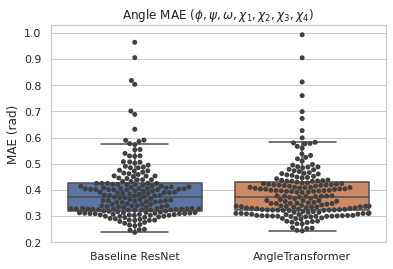

In [23]:
ax = sns.boxplot(data=pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (rad)")
plt.title("Angle MAE ($\phi, \psi, \omega, \chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']].describe()

,bl_chi_angles_mae_deg,at_chi_angles_mae_deg
count,187.000000,187.000000
mean,22.517827,22.505234
std,6.341784,6.307669
min,13.616671,13.947190
25%,18.394044,18.424463
50%,21.350529,21.369753
75%,24.357250,24.728443
max,55.237616,56.899677


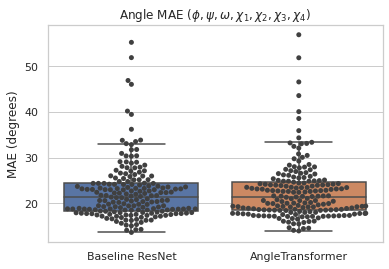

In [24]:
ax = sns.boxplot(data=pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi, \psi, \omega, \chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']].describe()

,bl_chionly_angles_mae_deg,at_chionly_angles_mae_deg
count,187.000000,187.000000
mean,40.235994,40.426388
std,7.272734,7.286395
min,26.657294,27.049810
25%,35.289163,35.274192
50%,39.396162,39.438261
75%,43.130448,44.180539
max,62.757864,62.086544


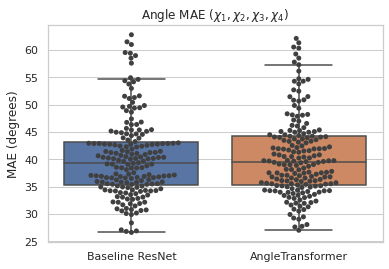

In [25]:
ax = sns.boxplot(data=pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']].describe()

/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


,bl_bbonly_angles_mae_deg,at_bbonly_angles_mae_deg
count,187.000000,187.000000
mean,10.578643,10.433509
std,6.926474,6.906458
min,4.540210,4.469044
25%,7.037221,6.882634
50%,8.846625,8.901774
75%,11.650933,11.653290
max,61.197188,61.233902


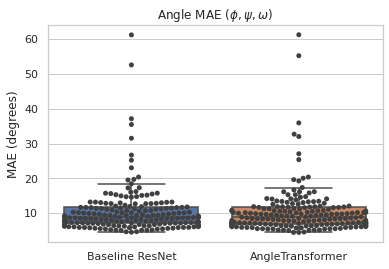

In [26]:
ax = sns.boxplot(data=pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi, \psi, \omega$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']].describe()

## Single Angle Plots

In [39]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
l[3:4]

[3]

In [48]:
pdb_df['true_bl_chi_angles'].iloc[0][:, 7:9]

array([], shape=(69, 0), dtype=float64)

,bl_x1_angles_mae_deg,at_x1_angles_mae_deg
count,187.000000,187.000000
mean,27.821665,27.725474
std,9.892014,9.837154
min,14.460758,13.469998
25%,20.282274,20.353699
50%,25.813690,25.484479
75%,32.526287,32.223935
max,65.109494,67.568310


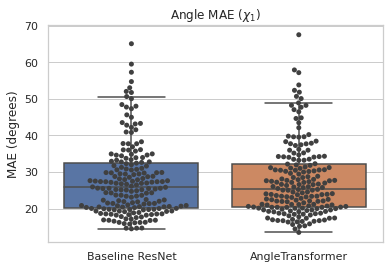

In [49]:
pdb_df['bl_x1_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 3:4]), torch.tensor(row['pred_bl_chi_angles'][:, 3:4]))), axis=1)
pdb_df['at_x1_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 3:4]), torch.tensor(row['pred_at_chi_angles'][:, 3:4]))), axis=1)

pdb_df['bl_x1_angles_mae_deg'] = pdb_df['bl_x1_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x1_angles_mae_deg'] = pdb_df['at_x1_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_1$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']].describe()

,bl_x2_angles_mae_deg,at_x2_angles_mae_deg
count,187.000000,187.000000
mean,44.616292,45.033071
std,7.985333,8.108334
min,25.123979,26.488658
25%,38.932635,39.825341
50%,44.272153,45.021158
75%,49.097941,49.226922
max,66.107133,65.329367


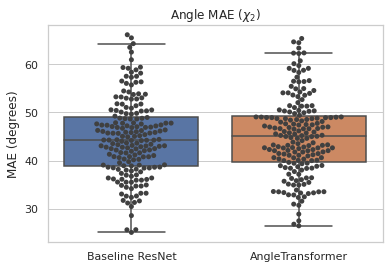

In [55]:
pdb_df['bl_x2_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 4:5]), torch.tensor(row['pred_bl_chi_angles'][:, 4:5]))), axis=1)
pdb_df['at_x2_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 4:5]), torch.tensor(row['pred_at_chi_angles'][:, 4:5]))), axis=1)

pdb_df['bl_x2_angles_mae_deg'] = pdb_df['bl_x2_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x2_angles_mae_deg'] = pdb_df['at_x2_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_2$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']].describe()

,bl_x3_angles_mae_deg,at_x3_angles_mae_deg
count,187.000000,187.000000
mean,61.016129,61.396190
std,10.858238,10.555421
min,36.477050,36.365498
25%,53.030644,54.098244
50%,60.084275,60.607160
75%,68.389011,68.047583
max,88.433500,87.774508


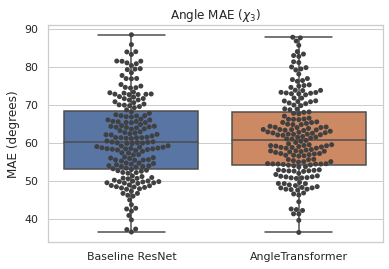

In [56]:
pdb_df['bl_x3_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 5:6]), torch.tensor(row['pred_bl_chi_angles'][:, 5:6]))), axis=1)
pdb_df['at_x3_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 5:6]), torch.tensor(row['pred_at_chi_angles'][:, 5:6]))), axis=1)

pdb_df['bl_x3_angles_mae_deg'] = pdb_df['bl_x3_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x3_angles_mae_deg'] = pdb_df['at_x3_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_3$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']].describe()

,bl_x4_angles_mae_deg,at_x4_angles_mae_deg
count,187.000000,187.000000
mean,50.333611,50.429040
std,11.892184,11.462195
min,13.908920,10.988702
25%,43.356377,43.920329
50%,49.083724,48.911931
75%,58.206154,57.777411
max,83.806583,83.406159


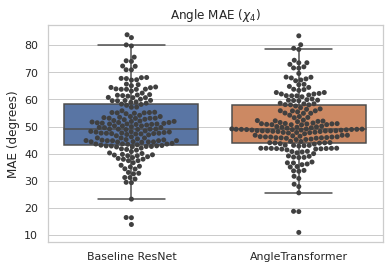

In [57]:
pdb_df['bl_x4_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 6:7]), torch.tensor(row['pred_bl_chi_angles'][:, 6:7]))), axis=1)
pdb_df['at_x4_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 6:7]), torch.tensor(row['pred_at_chi_angles'][:, 6:7]))), axis=1)

pdb_df['bl_x4_angles_mae_deg'] = pdb_df['bl_x4_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x4_angles_mae_deg'] = pdb_df['at_x4_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']].describe()

,bl_phi_angles_mae_deg,at_phi_angles_mae_deg
count,187.000000,187.000000
mean,12.221775,12.049416
std,6.336615,6.206274
min,5.144517,4.960073
25%,8.085994,8.111394
50%,10.641595,10.671106
75%,14.005269,13.833885
max,49.055105,47.140602


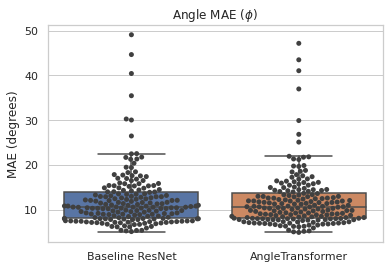

In [51]:
pdb_df['bl_phi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 0:1]), torch.tensor(row['pred_bl_chi_angles'][:, 0:1]))), axis=1)
pdb_df['at_phi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 0:1]), torch.tensor(row['pred_at_chi_angles'][:, 0:1]))), axis=1)

pdb_df['bl_phi_angles_mae_deg'] = pdb_df['bl_phi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_phi_angles_mae_deg'] = pdb_df['at_phi_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']].describe()

/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


,bl_psi_angles_mae_deg,at_psi_angles_mae_deg
count,187.000000,187.000000
mean,15.392409,15.138001
std,14.655602,14.687332
min,5.550041,5.439479
25%,8.915404,8.815269
50%,12.064926,11.994945
75%,16.629464,16.167673
max,150.928967,151.298894


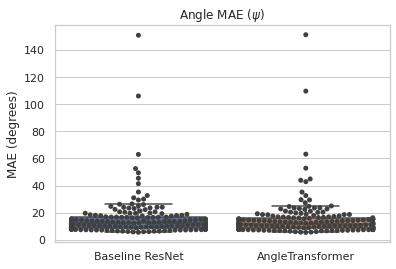

In [52]:
pdb_df['bl_psi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 1:2]), torch.tensor(row['pred_bl_chi_angles'][:, 1:2]))), axis=1)
pdb_df['at_psi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 1:2]), torch.tensor(row['pred_at_chi_angles'][:, 1:2]))), axis=1)

pdb_df['bl_psi_angles_mae_deg'] = pdb_df['bl_psi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_psi_angles_mae_deg'] = pdb_df['at_psi_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\psi$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']].describe()

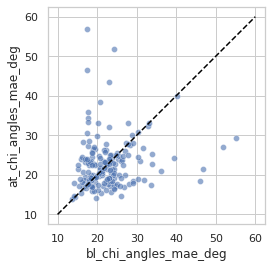

In [22]:
# Make distribution plots of the MAE of the chi angles

# Make a scatter plot of the MAE of the chi angles
sns.scatterplot(data=pdb_df, x='bl_chi_angles_mae_deg', y='at_chi_angles_mae_deg', alpha=0.6)

# Make the scatter plot square
plt.gca().set_aspect('equal', adjustable='box')
# Make the x and y axes have the same number of ticks
plt.gca().set_xticks(plt.gca().get_yticks())
plt.gca().set_yticks(plt.gca().get_xticks())


# Add a y = x line 
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', linestyle='--')




In [35]:
# Find the row in which at_chi_angles_mae_deg is the lowest
ex_idx = pdb_df['at_chi_angles_mae_deg'].idxmin()
bad_idx = pdb_df['at_chi_angles_mae_deg'].idxmax()

### Good Examples

In [32]:
p1 = pdb_df['true_at_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:
p1 = pdb_df['true_bl_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [34]:
p1 = pdb_df['pred_bl_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Bad example

In [36]:
p1 = pdb_df['true_at_scnprotein_obj'].iloc[bad_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[bad_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [37]:
p1 = pdb_df['true_bl_scnprotein_obj'].iloc[bad_idx]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[bad_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol